# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
##       
# 3. Classification / Prediction 
# A. with Multiple Logistic Regression

In this section we use the feature matrices and response vectors with features selected in chapter 2.  

#### We use two different versions (created in chapter 1, features-selected in chapter 2):
Version 1: Feature Matrix consists only of the Ratios                                                                        
Version 2: Feature Matrix consists of Ratios + dummy variables for seasonality + other market data
####  We will do Classification and Prediction with Single and Multiple Regression


In [1]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use("seaborn-whitegrid")
%matplotlib inline

## 3.0. SETTINGS:

### (1) Choose the Dataset Version you want

##### Reduced Feature Matrix (Features pre-selected)
VERSION = 1; Reduced Feature Matrix with only ratios                                  
VERSION = 2;  Reduced Feature Matrix with ratios + saisonality + other market data

In [2]:
### Choose which dataset version you want the selection of features and the prediction to be based on 
VERSION = 2
"""
INSERT NUMBER 1 or 2
"""


# Defining sel_state variable for usage later and printing text according to your choise   
if VERSION == 1:
    sel_version = 'based on a Dataset with only Ratios as predictive Features.'
elif VERSION == 2:
    sel_version = 'based on a Dataset with Ratios + Seasonality + other Market   Data as predictive Features.'
else: raise ValueError('VERSION must be either 1 or 2')
print('You chose VERSION '+str(VERSION)+' as working dataset. '+'\n'+'The following Classification/ Prediction will be therefore ' 
          + sel_version)

You chose VERSION 2 as working dataset. 
The following Classification/ Prediction will be therefore based on a Dataset with Ratios + Seasonality + other Market   Data as predictive Features.


### (2) Choose which method you want to have the features been pre-selected with
SELECTON  = RF ; Features pre-selected with Random Forest Classifier                                                           
SELECTION = PCA; Features pre-selected with Principal Component Analysis (PCA)

In [3]:
### Choose whether you want the datasets with features selected with RF or PCA
SELECTION = 'RF'
"""
INSERT 'RF' OR 'PCA'
"""


# Define sel_state variable for easier printing out    
if SELECTION == 'RF':
    sel_feat = 'Random Forest (RF)'
elif SELECTION == 'PCA':
    sel_feat = 'Principal Component Analysis (PCA)'
else: raise ValueError('SELECTION must be either RF or PCA')
briefing = ('You chose dataset VERSION '+str(VERSION)+' and SELECTION method '+str(SELECTION)+'.'+'\n'+'Features therefore pre-selected with '+str(sel_feat)+'.')
#print(sel_feat)
print('You chose SELECTION method '+str(sel_feat)+'.')

You chose SELECTION method Random Forest (RF).


### (3) SUMMARY OF SETTINGS

In [4]:
print(briefing, '\n')
print('VERSION '+str(VERSION)+' is '+str(sel_version),'\n')
print('You are now done with the Settings. You can run the whole Code now by Default.')

You chose dataset VERSION 2 and SELECTION method RF.
Features therefore pre-selected with Random Forest (RF). 

VERSION 2 is based on a Dataset with Ratios + Seasonality + other Market   Data as predictive Features. 

You are now done with the Settings. You can run the whole Code now by Default.


## 3.1. Preparation

### 3.1.1. Import the Response Vector and the Feature Matrix

In [5]:
# import Data (already splitted to train/test-data and selected features-> bc_randomforest_feature_selection)
if VERSION == 1:
    if SELECTION == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_train_f.csv', sep=',')
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_test_f.csv', sep=',')
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_train_f.csv', sep=',')
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_test_f.csv', sep=',')
    elif SELECTION == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_test_p.csv', sep=',', header=0)
elif VERSION == 2:
    if SELECTION == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_train_f.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_test_f.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_train_f.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_test_f.csv', sep=',', header=0)
    elif SELECTION == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_test_p.csv', sep=',', header=0)
else: raise ValueError('_VERSION_ value must be either 1 or 2, _SELECTION_ must be either RF or PCA')   

### 3.1.2. Print out Shape and Form of Feature Matrix and Response Vector


### Train Set

In [6]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# print properties and head of datasets
print('Shape (rows, columns) of Feature Matrix X (Train) ' + '=' + str(X_train_s.shape),'\n')
print('Feature Matrix X (Train) with Selected Features')
display(X_train_s[0:3])
print("")
print('Response Vector y (Train) after Feature Selection')
display(y_train_s[0:3])
print("")

Features Selected with Random Forest (RF)
Version 2; based on a Dataset with Ratios + Seasonality + other Market   Data as predictive Features. 

Shape (rows, columns) of Feature Matrix X (Train) =(2836, 20) 

Feature Matrix X (Train) with Selected Features


,ewretd,ewretx,vwretx,vwretd,sprtrn,SHRENDDT,ALTPRCDT,pe_op_dil,CAPEI,pe_op_basic,VOL,RETX,RET,divyield,pe_inc,PEG_ltgforward,ps,SEASON_07,pcf,PEG_1yrforward
0,0.033697,0.032156,0.038183,0.040186,0.037655,20140929.0,20140829.0,15.633,20.773,15.468,4611190.0,0.024042,0.024042,0.0354,18.484,5.963,3.703,0.0,9.957,13.678
1,-0.013012,-0.015631,-0.017055,-0.015039,-0.014999,20130730.0,20130628.0,17.296,25.089,17.203,1296447.0,-0.066454,-0.057168,0.0398,39.232,5.702,0.689,0.0,8.509,1.521
2,0.044257,0.042687,0.043937,0.046173,0.043117,20140330.0,20140228.0,9.209,12.337,9.135,3473222.0,0.026373,0.026373,0.0268,13.062,2.248,2.034,0.0,1.993,0.380



Response Vector y (Train) after Feature Selection


,0
0,0
1,1
2,0


### Test Set

In [7]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# print properties and head of datasets
print('Shape (rows, columns) of Feature Matrix X (Test) ' + '=' + str(X_test_s.shape),'\n')
print('Feature Matrix X (Train) with Selected Features')
display(X_test_s[0:3])
print("")
print('Response Vector y (Test) after Feature Selection')
display(y_test_s[0:3])
print("")

Features Selected with Random Forest (RF)
Version 2; based on a Dataset with Ratios + Seasonality + other Market   Data as predictive Features. 

Shape (rows, columns) of Feature Matrix X (Test) =(710, 20) 

Feature Matrix X (Train) with Selected Features


,ewretd,ewretx,vwretx,vwretd,sprtrn,SHRENDDT,ALTPRCDT,pe_op_dil,CAPEI,pe_op_basic,VOL,RETX,RET,divyield,pe_inc,PEG_ltgforward,ps,SEASON_07,pcf,PEG_1yrforward
0,-0.044988,-0.046891,-0.026823,-0.025129,-0.015514,20141009.0,20140930.0,16.224,20.983,16.127,15283673.0,-0.017073,-0.017073,0.0187,16.224,1.330,3.318,0.0,10.484,1.414
1,0.051828,0.049754,0.035682,0.037477,0.029749,20131030.0,20130930.0,16.489,21.663,16.311,746229.0,0.050202,0.050202,0.0122,18.555,1.572,2.379,0.0,7.709,1.737
2,-0.011388,-0.012292,-0.038109,-0.037096,-0.036974,20100225.0,20100129.0,9.520,16.327,9.520,10148052.0,0.025838,0.025838,0.0343,15.550,6.149,3.293,0.0,8.490,-0.973



Response Vector y (Test) after Feature Selection


,0
0,1
1,0
2,1


## 3.2. Simple Logistic Regression (statsmodels) (SLM)

### 3.2.1. Preparation and fitting (on Training Set) , define BEST FEATURE (SLM)

In [8]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# Run Simple Logistic Regression
# Logistic Regression (with the most important feature from feature selection)
# Assign "best_feature" to matrix X and response to y, acording to chosen Version of datasets and feature Selection method
pca_error = ('ERROR: PCA best feature not defined (PCA is unlabeled)! Thus no Simple Regression available.'+'\n'+'Proceed to Multiple Regression in chapter 3.3.')
if VERSION == 1:
    if SELECTION == 'RF':
        best_feature = 'CAPEI'
        logReg = sm.Logit(endog = y_train_s, exog= sm.add_constant(X_train_s[best_feature])).fit()
    elif SELECTION == 'PCA':
        best_feature = None
        print(pca_error)
elif VERSION == 2:
    if SELECTION == 'RF':
        best_feature = 'RET'
        logReg = sm.Logit(endog = y_train_s, exog= sm.add_constant(X_train_s[best_feature])).fit()
    elif SELECTION == 'PCA':
        best_feature = None
        print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')

Features Selected with Random Forest (RF)
Version 2; based on a Dataset with Ratios + Seasonality + other Market   Data as predictive Features. 

Optimization terminated successfully.
         Current function value: 0.679817
         Iterations 4


### 3.2.2. Summary (SLM)

In [9]:
# Workaround solution for error ("AttributeError: module 'scipy.stats' has no attribute 'chisqprob'")
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [10]:
# LogReg with only one feature as exogen variable
if SELECTION == 'RF':
    print(logReg.summary(),'\n')
    print('logReg pvalues: '+'\n')
    print(logReg.pvalues)
elif SELECTION == 'PCA':
    print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2836
Model:                          Logit   Df Residuals:                     2834
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Apr 2018   Pseudo R-squ.:               0.0003420
Time:                        14:07:45   Log-Likelihood:                -1928.0
converged:                       True   LL-Null:                       -1928.6
                                        LLR p-value:                    0.2507
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3201      0.038      8.340      0.000       0.245       0.395
RET            0.6252      0.545      1.147      0.251      -0.443       1.694

logReg pvalues: 

const    7.413083e-17
RET      2.

### 3.2.3. Assessing Output (SLM)

### Hypothesis testing / Confidence Interval

In [11]:
significance_level = 0.01

if SELECTION == 'RF':
    print(str(int(100 - significance_level*100)) + '% Confidence Interval (Significance Level ' 
          + str(int(significance_level*100)) + '%)')
    display(logReg.conf_int(alpha=significance_level))
elif SELECTION == 'PCA':
    print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')

99% Confidence Interval (Significance Level 1%)


,0,1
const,0.221223,0.418929
RET,-0.779125,2.029456


### Confusion Matrix

In [12]:
if SELECTION == 'RF':
    display(logReg.pred_table(threshold=0.5))
elif SELECTION == 'PCA':
    print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')

array([[   0., 1189.],
       [   0., 1647.]])

### 3.2.2. Prediction (SML)

### I: In-sample Prediction of probability for returns going UP in the next period (predict y_train)


#### Prediction of whole Response Vector (Train) based on all available values of the single chosen feature (Train)

In [13]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# X must include 1 in first column for intercept
# we wish to get the probability of 'UP' (=1) for the whole test set
if SELECTION == 'RF':
    pred_train_all = logReg.predict(sm.add_constant(X_train_s[best_feature]))
    print('Predicted probability of price going UP for whole Feature Train Set is: ')
    display(pred_train_all.head(3))
    print('Actual Response Vector y_train is:')
    display(y_train_s.head(3))
elif SELECTION == 'PCA':
    print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')

Features Selected with Random Forest (RF)
Version 2; based on a Dataset with Ratios + Seasonality + other Market   Data as predictive Features. 

Predicted probability of price going UP for whole Feature Train Set is: 


0    0.583001
1    0.570609
2    0.583356
dtype: float64

Actual Response Vector y_train is:


,0
0,0
1,1
2,0


### ii: New-sample Prediction of probability for returns going UP in the next period (predict y_test)

#### ONE prediction For ONE specific chosen value of predictive variable


In [14]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')
print('Chosen best feature = ' + str(best_feature))

#### Choose value fo chosen best feature manually
# Here: chosen median of feature values + /3 of median of feature values
bfv = np.median(X_train_s[best_feature])+ np.median(X_train_s[best_feature])/3
#bfv = np.mean(X_train_s[best_feature])
#bfv = np.median(X_train_s[best_feature])

# Loop for Version differenciation
# X must include 1 in first column for intercept
# we wish to get the probability of 'UP' (=1) for a best_feature_value of USD 15
if VERSION == 1:
    if SELECTION == 'RF':
        best_feature_value = bfv
        print('Chosen value of best feature = ' + str(best_feature_value),'\n')
        pred_test_one = logReg.predict([1, best_feature_value])
        ratio_response_train = y_train_s.sum() / y_train_s.size
        print('Predicted probability of price going UP with chosen ' + str(best_feature) + ' value is: '
              + str("%.4f" % round(float(pred_test_one*100),4)) + '%'+'\n')
        print('Actual Ratio of "UP" (Train)  =  ' + str("%.4f" % round(float(ratio_response_train*100),4)) + '%')
    elif SELECTION == 'PCA':
        print(pca_error)  
elif VERSION == 2:
        if SELECTION == 'RF':
            best_feature_value = bfv
            print('Chosen value of best feature = ' + str(best_feature_value),'\n')
            pred_test_one = logReg.predict([1, best_feature_value])
            ratio_response_train = y_train_s.sum() / y_train_s.size
            print('Predicted probability of price going UP with chosen ' + str(best_feature) + ' value is: '
                  + str("%.4f" % round(float(pred_test_one*100),4)) + '%')
            print('Ratio of "UP" (Train)  =  ' + str("%.4f" % round(float(ratio_response_train*100),4)) + '%')
        elif SELECTION == 'PCA':
            print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA.')

Features Selected with Random Forest (RF)
Version 2; based on a Dataset with Ratios + Seasonality + other Market   Data as predictive Features. 

Chosen best feature = RET
Chosen value of best feature = 0.014656666666666667 

Predicted probability of price going UP with chosen RET value is: 58.1574%
Ratio of "UP" (Train)  =  58.0748%


#### Prediction of whole Response Vector (Test) based on all available values of the single chosen feature (Test)

In [15]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# we wish to get the probability of 'UP' (=1) for the whole test set
if SELECTION == 'RF':
    pred_test_all = logReg.predict(sm.add_constant(X_test_s[best_feature]))
    print('Predicted probability of price going UP for whole Feature Test Set is: '+'\n')
    display(pred_test_all.head(3))
    print('Actual Response Vector y_train is:')
    display(y_test_s.head(3))
elif SELECTION == 'PCA':
    print(pca_error)
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')    

Features Selected with Random Forest (RF)
Version 2; based on a Dataset with Ratios + Seasonality + other Market   Data as predictive Features. 

Predicted probability of price going UP for whole Feature Test Set is: 



0    0.576739
1    0.586972
2    0.583274
dtype: float64

Actual Response Vector y_train is:


,0
0,1
1,0
2,1


### 3.2.3. Plot Results for Training Set (SLM)

Features Selected with Random Forest (RF)
Version 2; based on a Dataset with Ratios + Seasonality + other Market   Data as predictive Features. 

Chosen best feature = RET


array([0.58300131, 0.5706091 , 0.58335555, ..., 0.57415492, 0.58036462,
       0.56136237])

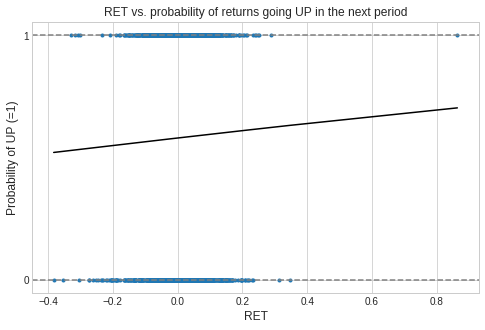

In [16]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')
print('Chosen best feature = ' + str(best_feature))

display(logReg.predict())
# Plot scatter and log.Reg
if SELECTION == 'RF':
    
    # Transfer best_feature column an prediction for response vector in a newly made dataframe "res"
    res = pd.DataFrame()
    res['best_feature'] = X_train_s[best_feature]
    res['probability'] = logReg.predict()
    # Sort results by values of the best_feature column
    res = res.sort_values('best_feature')

    # Plot
    plt.figure(figsize =(8,5))
    plt.title(str(best_feature) + ' vs. probability of returns going UP in the next period');
    plt.scatter(X_train_s[best_feature], y_train_s, marker ='.')
    plt.plot(res.best_feature, res.probability, c = 'k')
    plt.axhline(y=0, color = "gray", linestyle = "dashed")
    plt.axhline(y=1, color = "gray", linestyle = "dashed")
    plt.ylabel("Probability of UP (=1)", fontsize =12)
    plt.xlabel(str(best_feature), fontsize =12)
    
elif SELECTION == 'PCA':
    print(pca_error)
    
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')  

## 3.3. Multiple Logistic Regression with n pre-selected features (MLR1)

### 3.3.1. Preparation and fitting (on Training Set) (MLR1)

In [17]:
## Multiple Log. Regression (with all n best features chosen in Chapter 2 in the feature selection process)
logReg_m = sm.Logit(endog = y_train_s, exog = sm.add_constant(X_train_s)).fit() 

Optimization terminated successfully.
         Current function value: 0.647775
         Iterations 10


### 3.3.2. Summary (MLR1)

In [18]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')
print("Multiple Logistic Regression with all selected features"+'\n')

# Workaround solution for error ("AttributeError: module 'scipy.stats' has no attribute 'chisqprob'")
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Run Multiple Logistic Regression
print(logReg_m.summary().tables[0])
print(logReg_m.summary().tables[1])

Features Selected with Random Forest (RF)
Version 2; based on a Dataset with Ratios + Seasonality + other Market   Data as predictive Features. 

Multiple Logistic Regression with all selected features

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2836
Model:                          Logit   Df Residuals:                     2815
Method:                           MLE   Df Model:                           20
Date:                Sat, 14 Apr 2018   Pseudo R-squ.:                 0.04746
Time:                        14:09:27   Log-Likelihood:                -1837.1
converged:                       True   LL-Null:                       -1928.6
                                        LLR p-value:                 2.441e-28
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

### 3.3.3. Assessing Output (MLR1)

### Hypothesis testing / Confidence Interval

In [19]:
significance_level = 0.01

# Print Confidence Interval with Title
print(str(int(100 - significance_level*100)) + '% Confidence Interval (Significance Level ' 
      + str(int(significance_level*100)) + '%)')
display(logReg_m.conf_int(alpha=significance_level))

99% Confidence Interval (Significance Level 1%)


,0,1
const,-9.995965e+01,5.628828e+01
ewretd,-3.145157e+02,6.396322e+01
ewretx,-4.750084e+01,3.330962e+02
vwretx,-9.846929e+01,4.630628e+02
vwretd,-4.863934e+02,6.330886e+01
sprtrn,-1.039670e+01,3.990242e+01
SHRENDDT,-8.467927e-06,2.431069e-05
ALTPRCDT,-2.288415e-05,9.291835e-06
pe_op_dil,-1.892440e-01,3.868399e-01
CAPEI,-1.028153e-03,1.179705e-02


### Confusion Matrix

In [26]:
confm = logReg_m.pred_table(threshold=0.5)
display(confm)


TP = confm[0,0]
display(TP)
FP = confm[0,1]
display(FP)
TN = confm[1,0]
display(TN)
FN = confm[1,1]
display(FN)


# Sensitivity (True Positive Rate)
TP_rate  = TP / (TP+FN)

# False POsitive Rate (False ALarm Ratio)
FP_rate = FP / (FP+TN)


array([[ 407.,  782.],
       [ 262., 1385.]])

407.0

782.0

262.0

1385.0

### ROC Space

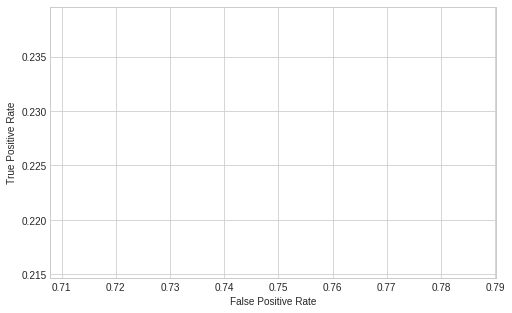

In [32]:
plt.figure(figsize =(8,5))
plt.plot(FP_rate, TP_rate, color='darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

### 3.3.4. Prediction (MLR1)
Multiple Logistic Regression 1 (pre-selected features with RandomForest in Chapter 2) 

### I: In-sample Prediction of probability for returns going UP in the next period (predict y_train)

#### For whole Training Set


In [271]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# Get the probability of 'UP' (=1) for the whole training set
pred_train_all = logReg_m.predict(sm.add_constant(X_train_s))

# Print Prediction and Response Vector, with Title
print('Predicted probabilities of price going UP for whole Feature Set (Train) are: ')
display(pred_train_all[0:3])
print("")
print('Response Vector (Train): ')
display(y_train_s[0:3])

Features Selected with Random Forest (RF)
Version 1; based on a Dataset with only Ratios as predictive Features. 

Predicted probabilities of price going UP for whole Feature Set (Train) are: 


0    0.699485
1    0.501512
2    0.682452
dtype: float64


Response Vector (Train): 


,0
0,0
1,1
2,0


### II: New-sample Prediction of probability for returns going UP in the next period (predict y_test)

#### For whole Test Set


In [272]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# Get the probability of 'UP' (=1) for the whole test set
pred_test_all = logReg_m.predict(sm.add_constant(X_test_s))

# Print Prediction and Response Vector, with Title
print('Predicted probability of price going UP for whole Feature Set (Test) is: ')
display(pred_test_all.head(3))
print("")
print('Response Vector (Test): ')
display(y_test_s.head(3))

Features Selected with Random Forest (RF)
Version 1; based on a Dataset with only Ratios as predictive Features. 

Predicted probability of price going UP for whole Feature Set (Test) is: 


0    0.615165
1    0.615856
2    0.654717
dtype: float64


Response Vector (Test): 


,0
0,1
1,0
2,1


In [273]:
# compare LogReg with only one feature as exogen variable & LogReg 1 
# (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))

In [274]:
# Check for non significant values (p-value > 0.05) and the Log-Likelihood value

## 3.4. Multiple Logistic Regression with only significant features (MLR2)

Apply an other multiple logistic regression on a transformed dataset with only all significant values from LogReg_m (above)

### 3.4.1. Extract significant features (MLR2)

In [275]:
# extracting significant features with an alpha-boundery of 0.05
condition = np.where(logReg_m.pvalues < 0.05)
print('"Condition" array with index starting with intercept:')
display(condition)

# Subtract '1' fom every entry in the numpy array "condition", because in logReg index 0 starts with the intercept
# but in the X_train_s set the index 0 starts with the first feature already
# otherwise there would be an error "index out of range" when we would try to apply the condition to the X_train_s set
condition_sub = np.subtract(condition, 1)
print('"Condition" array with index starting with the first feature, leaving intercept out of the counting:')
display(condition_sub)

# extract significant features
sign_features = X_train_s.columns.values[condition_sub].tolist()[0]
print('Features that were significant in the previous MLR in chapter 3.3.:')
print(sign_features)

"Condition" array with index starting with intercept:


(array([ 1,  4,  5,  7,  8,  9, 10, 12, 15]),)

"Condition" array with index starting with the first feature, leaving intercept out of the counting:


array([[ 0,  3,  4,  6,  7,  8,  9, 11, 14]])

Features that were significant in the previous MLR in chapter 3.3.:
['CAPEI', 'bm', 'ptb', 'evm', 'ps', 'pe_exi', 'divyield', 'pe_inc', 'roce']


### 3.4.2. Preparation and fitting (on Training Set) (MLR2)

In [120]:
## Multiple Log. Regression (with significant features from logreg above)
# Assign features to X and response vector y

if SELECTION == 'RF':
    logReg_mm = sm.Logit(endog = y_train_s, exog=sm.add_constant(X_train_s[sign_features])).fit()
elif SELECTION == 'PCA':
    logReg_mm = sm.Logit(endog = y_train_s, exog=sm.add_constant(X_train_s[sign_features])).fit()
else: raise ValueError('SELECTION must be either RF or PCA')

Optimization terminated successfully.
         Current function value: 0.675492
         Iterations 5


LinAlgError: Singular matrix

### 3.4.3. Summary (MLR2)

In [121]:
if SELECTION == 'RF':
    print("Multiple Logistic Regression with selected significant features"+'\n')
    print(logReg_mm.summary().tables[0])
    print(logReg_mm.summary().tables[1])
elif SELECTION == 'PCA':
    print("Multiple Logistic Regression with selected significant features"+'\n')
    print(logReg_mm.summary().tables[0])
    print(logReg_mm.summary().tables[1])
else: raise ValueError('SELECTION must be either RF or PCA')

Multiple Logistic Regression with selected significant features



NameError: name 'logReg_mm' is not defined

#### compare LogReg 1 & 2 (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))

PREDICTION!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [33]:
# Does the logistic regression support our choice in feature selection (with random forest)?

# CODE DIRECTLY COPIED FROM STEFANIE FILE

## 3. Prediction

In [ ]:
# compare LogReg A & B (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))
# Does the logistic regression support our choice in feature selection (with random forest)?

### 3.1 Version 1 with best LogReg Model

In [ ]:
modelA = LogisticRegression()
modelA.fit(X1_train_s, y1_train)

expected = y1_test
predicted = modelA.predict(X1_test_s)

In [ ]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [ ]:
# loglikelihood for "regression" of predicted on expected
from sklearn.metrics import log_loss

log_loss(expected, predicted)

### 3.2 Version 2 with best LogReg Model

In [ ]:
modelB = LogisticRegression()
modelB.fit(X2_train_s, y2_train)

expected = y2_test
predicted = modelB.predict(X2_test_s)

In [ ]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [ ]:
# loglikelihood for "regression" of predicted on expected
from sklearn.metrics import log_loss

log_loss(expected, predicted)